# Homework 3 #

Create the dataset.  <br/>
Separate variables and target - "quality".

In [103]:
import pandas as pd
# Reading the csv file
df = pd.read_csv('winequality-red.csv')
# Separating the variables from the target
variables = df.drop("quality", axis= 1)
target = df['quality']

Do a 80-20 train-test split using a fixed seed.

In [104]:
from sklearn.model_selection import train_test_split
# Training Test Split
variables_train, variables_test, target_train, target_test= train_test_split(variables, target, 
                                                                         train_size=0.8, random_state=0)

### Exercise 1 ##

Learn 10 MLP regressors with the parameters specified but with different seeds (from 1 to 10). Calculate residues and save them in an array.

In [105]:
import numpy as np
from sklearn.neural_network import MLPRegressor

######### Exercise 1 ##########

residues = np.array([])

for i in range(1, 11):
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict output
    y_pred = mlp.fit(variables_train,target_train).predict(variables_test)
    #Calculate residues
    residue = abs(target_test - y_pred)
    residue = residue.to_numpy()
    residues = np.append(residues, residue)

/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

Plot the residues using an histogram.

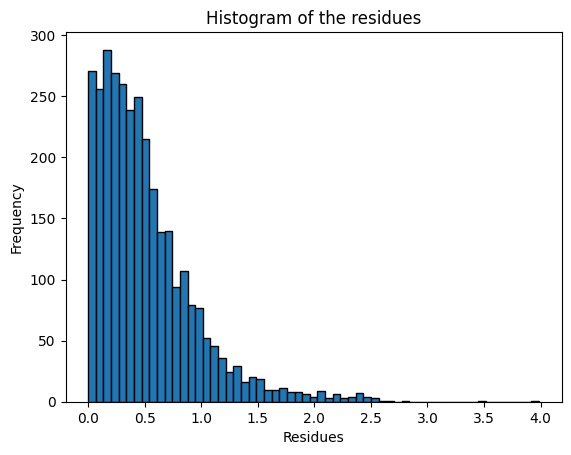

In [106]:
import matplotlib.pyplot as plt

#Plot all the residues
plt.hist(residues, edgecolor='black',bins='auto')
plt.title('Histogram of the residues')
plt.xlabel('Residues')
plt.ylabel('Frequency')
plt.savefig('ex1_histogram.png')
plt.show()

### Exercise 2 ###

Learn an MLP regressor with seeds from 1 to 10 and calculate de mean absolute error of:
- the predicted output
- the predicted output rounded to the nearest integer
- the predicted output bounded between 1 and 10
- the predicted output rounded to the nearest integer and bounded between 1 and 10

Calculate the mean of these MAES and print the results.

In [107]:
# Round and bound the predictions
mae_array = np.array([])
mae_bounded_array = np.array([])
mae_rounded_array = np.array([])
mae_rounded_and_bounded_array = np.array([])

for i in range(1, 11):
    # Learn the MLP regressor 
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)

    #Calculate MAE
    y_pred = mlp.fit(variables_train,target_train).predict(variables_test)
    mae = np.mean(abs(target_test - y_pred))
    mae_array = np.append(mae_array, mae)
    
    #Calculate MAE - rounded
    y_pred_rounded = np.round(y_pred)
    mae_rounded = np.mean(abs(target_test - y_pred_rounded))
    mae_rounded_array = np.append(mae_rounded_array, mae_rounded)
    
    #Calculate MAE - bounded
    y_pred_bounded = np.clip(y_pred, a_min=1, a_max=10)
    mae_bounded = np.mean(abs(target_test - y_pred_bounded))
    mae_bounded_array = np.append(mae_bounded_array, mae_bounded)

    ##Calculate MAE - rounded and bounded
    y_pred_rounded_and_bounded = np.clip(y_pred_rounded, a_min=1, a_max=10)
    mae_rounded_and_bounded = np.mean(abs(target_test - y_pred_rounded_and_bounded))
    mae_rounded_and_bounded_array = np.append(mae_rounded_and_bounded_array, mae_rounded_and_bounded)

mean_mae = np.mean(mae_array)
mean_mae_rounded = np.mean(mae_rounded_array)
mean_mae_bounded = np.mean(mae_bounded_array)
mean_mae_rounded_and_bounded = np.mean(mae_rounded_and_bounded_array)

# Print the results
print('MAE (not rounded and not bounded): ', mean_mae)
print('MAE (rounded): ', mean_mae_rounded)
print('MAE (bounded): ', mean_mae_bounded)
print('MAE (rounded and bounded): ', mean_mae_rounded_and_bounded)



/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

MAE (not rounded and not bounded):  0.5097171955009514
MAE (rounded):  0.43875000000000003
MAE (bounded):  0.5097171955009514
MAE (rounded and bounded):  0.43875000000000003


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Exercise 3 ###

Calculate the RMSE of the predicted outputs of the MLP's seeded from 1 to 10.
Calculate the mean of these 10 RMSE's.

In [108]:
sum_rmse_old = 0
for i in range(1, 11):
    #Learn the old MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=i)
    #Predict old output
    y_pred_old = mlp.fit(variables_train,target_train).predict(variables_test)
    #Calculate old RMSE
    rmse = np.sqrt(np.mean((target_test - y_pred_old) ** 2))
    sum_rmse_old += rmse

average_rmse_old = np.mean(sum_rmse_old/10)


/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptro

Learn MLP regressors with the same parameters as before except early stopping, instead stopping after 20, 50, 100 and 200 iterations. Calculate their root mean squared error. This RMSE is considered to be the average between 10 RMSE's calculated for each of the MLP's with seeds 1-10.

In [ ]:
# Calculate the RMSE for each number of iterations
new_rmse_array = []
iter_array = [20,50,100,200]
for iter in iter_array:
    y_pred_new = np.zeros(len(target_test))
    sum_rmse_new = 0
    for i in range(1, 11):
        # Learn the new MLP regressor 
        mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', solver='adam', max_iter = iter, random_state=i)
        #Predict new output
        y_pred_new = mlp.fit(variables_train,target_train).predict(variables_test)
        #Calculate new RMSE
        rmse = np.sqrt(np.mean((target_test - y_pred_new) ** 2))
        sum_rmse_new += rmse
    #Append new RMSE
    new_rmse_array += [sum_rmse_new/10]

Define the constant function with the RMSE value calculated when early stopping is in effect. Plot the new RMSE's against the maximum number of iteration of the regressor and the old RMSE.

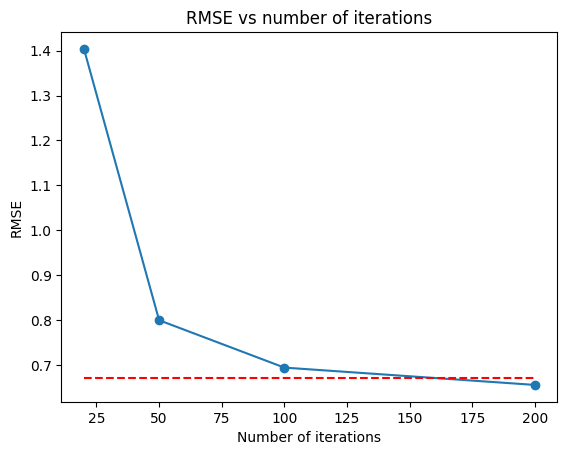

In [110]:
def const(x): return average_rmse_old

# Plot the RMSE
plt.plot(iter_array, new_rmse_array, '-o', label='RMSE')
plt.hlines(average_rmse_old, xmin=min(iter_array), xmax=max(iter_array), colors='r', linestyles='dashed')
plt.xlabel('Number of iterations') 
plt.ylabel('RMSE')
plt.title('RMSE vs number of iterations')
plt.savefig('ex3_rmse.png')
plt.show()
